In [1]:
%cd ..

/Users/dawood/Workspace/face-keypoints


In [2]:
import cv2
import torch

from data.ls3d import LS3D
from models.fpn import FPN as Model

from torch.nn import functional as F
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
model = Model(68)

In [ ]:
preds = model(torch.randn(1,3,512,512))
for i in preds:
    print(i.shape)

In [16]:
data = LS3D('/media/HDD1/Datasets/LS3D-W/300VW-3D/Trainset/', image_type='jpg', augment=True)

model = Model().cuda()

In [23]:
%time img, hm_gt, mask = data[100]

CPU times: user 394 ms, sys: 161 ms, total: 555 ms
Wall time: 541 ms


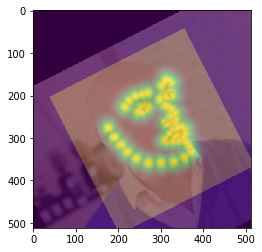

In [24]:
plt.imshow(img.permute(1,2,0).contiguous().numpy() )
plt.imshow(mask.numpy(), alpha=0.5)
plt.imshow(cv2.resize(hm_gt[:68].max(0)[0].numpy(), img.shape[1:]), alpha=0.5)

In [6]:
preds = model(img.unsqueeze(0).cuda())

torch.Size([1, 256, 32, 32]) torch.Size([1, 256, 32, 32])
torch.Size([1, 256, 64, 64]) torch.Size([1, 128, 64, 64])
torch.Size([1, 256, 128, 128]) torch.Size([1, 64, 128, 128])


In [12]:
preds[-1][0][:68].shape

torch.Size([68, 128, 128])

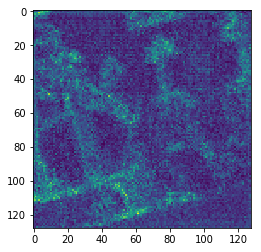

In [13]:
plt.imshow(preds[-1][0, :68].max(0)[0].cpu().detach().numpy())

In [15]:
model.calc_loss(preds, hm_gt.unsqueeze(0).cuda(), mask.unsqueeze(0).cuda())

tensor(1.00000e+05 *
       3.3409, device='cuda:0')

In [16]:
mask.sum()

tensor(16794.2266)